## Demonstration of the ECB Limitations

"This is an image that has become kind of a cultural icon in the cryptography and InfoSec community. I'm speaking about "the penguin", a picture of the Tux Linux mascot encrypted with a block cipher in ECB mode that still shows clearly the outline of the original."

https://blog.filippo.io/the-ecb-penguin/


<img src="res/penguin.png">


The initial block defines the functions that are necessary.

In [1]:
from PIL import Image
from Crypto.Cipher import AES
from Crypto import Random
from argparse import ArgumentParser
import matplotlib.pyplot as plt

def encrypt_image_ecb(image, key):
    image_array    = image.tobytes()
  







    return Image.frombytes("RGB", image.size, encrypted_image, "raw", "RGB")


def decrypt_image_ecb(image, key, iv=b''):
    image_array = image.tobytes()
    padding_length = AES.block_size - len(image_array) % AES.block_size
    image_array += bytes(padding_length * ".", "UTF-8") # Just an arbitrary padding byte

    mode   = AES.MODE_ECB
    aes    = AES.new(key, mode)

    decrypted_image = aes.decrypt(image_array)
    decrypted_image = decrypted_image[:-padding_length]

    return Image.frombytes("RGB", image.size, decrypted_image, "raw", "RGB")



print('Functions defined!')



Functions defined!


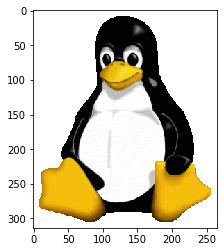

In [2]:
# This is the original image, to be encrypted with AES in both Modes: ECB and CBC
#AES - CBC ECB
image = Image.open('res/penguin.png').convert('RGBA').convert('RGB') 
plot = plt.imshow(image)


"You have a cipher, that with a key will encrypt 16 bytes of data. And you have some data, that is more than 16 bytes. So you have a problem. Well, ECB is the wrong solution to that problem: you just encrypt each 16-bytes block separately.

Why is it wrong? Because this way blocks that were equal before encryption will remain equal also after! And this will lead to all kinds of unwanted consequences."

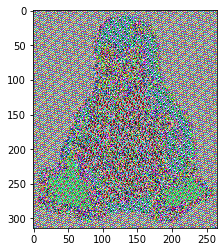

In [3]:
#Generate Random AES key 
key = Random.new().read(AES.key_size[0])

ecb_penguin = encrypt_image_ecb(image, key)
ecb_penguin.save('output/penguin_ecb.png')

plot = plt.imshow(ecb_penguin)


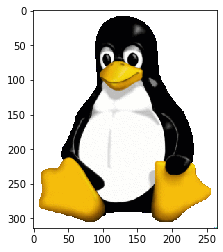

In [4]:
ecb_dec_penguin = decrypt_image_ecb(ecb_penguin, key)
ecb_dec_penguin.save('output/penguin_ecb_dec.png')
plot = plt.imshow(ecb_dec_penguin)


Using AES with the mode CBC instead of ECB should mitigate the problem.

## Exercise #1:

Implement the functions below to 

In [5]:
def encrypt_image_cbc(image, key, iv):
    

    #to be implemented

    return Image.frombytes("RGB", image.size, encrypted_image, "raw", "RGB")


def decrypt_image_cbc(image, key, iv):
   
    #to be implemented

    return Image.frombytes("RGB", image.size, decrypted_image, "raw", "RGB")



In [ ]:
# Using the key from above is not a problem in this exercise

cbc_penguin = encrypt_image_cbc(image, key)
cbc_penguin.save('output/penguin_cbc.png')

plot = plt.imshow(cbc_penguin)